<a href="https://colab.research.google.com/github/CSheppardCodes/Study-of-Data-Science/blob/main/Keras/TensorFlowMonkeyClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [ ]:
import os
from glob import glob
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix
import keras
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Lambda, MaxPool2D, BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import class_weight
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta, RMSprop
from keras.models import Sequential, model_from_json
from keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPool2D,MaxPooling2D,AveragePooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import cv2
import glob
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount your Google Drive.
from google.colab import drive
drive.mount("/content/drive")

!git clone https://github.com/CSheppardCodes/TFMonkeyClassification.git

Mounted at /content/drive
Cloning into 'TFMonkeyClassification'...
remote: Enumerating objects: 1458, done.
remote: Counting objects: 100% (712/712), done.
remote: Compressing objects: 100% (684/684), done.
remote: Total 1458 (delta 41), reused 666 (delta 28), pack-reused 746
Receiving objects: 100% (1458/1458), 497.12 MiB | 36.11 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Updating files: 100% (1365/1365), done.


In [ ]:
cols = ['Label','Latin Name', 'Common Name','Train Images', 'Validation Images']
["n0, alouatta_palliata", "n1, erythrocebus_patas", "n2, cacajao_calvus", "n3, macaca_fuscata", "n4, cebuella_pygmea", "n5, cebus_capucinus",
"n6, mico_argentatus", "n7, saimiri_sciureus", "n8, aotus_nigriceps", "n9, trachypithecus_johnii"]
labels = pd.read_csv("https://raw.githubusercontent.com/CSheppardCodes/TFMonkeyClassification/main/monkey_labels.txt", names=cols, skiprows=1)
labels

Label                Latin Name                      Common Name  \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

   Train Images  Validation Images  
0           131                 26  
1           139                 28  
2           137                 27  
3           152                 30  
4           131                 26  
5           141                 28  
6           132                 26  
7           142                 28  
8           133                 27  
9           132                 26

In [ ]:
labels = labels['Common Name']
labels

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

In [ ]:
train_dir = "/content/TFMonkeyClassification/training/"
test_dir =  "/content/TFMonkeyClassification/validation/"

from tqdm import tqdm
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['n0']:
                label = 0
            elif folderName in ['n1']:
                label = 1
            elif folderName in ['n2']:
                label = 2
            elif folderName in ['n3']:
                label = 3
            elif folderName in ['n4']:
                label = 4
            elif folderName in ['n5']:
                label = 5
            elif folderName in ['n6']:
                label = 6
            elif folderName in ['n7']:
                label = 7
            elif folderName in ['n8']:
                label = 8
            elif folderName in ['n9']:
                label = 9
            else:
                label = 10
            for image_filename in tqdm(os.listdir(folder + folderName)):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (224, 224, 3))

                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train_dir)
X_test, y_test= get_data(test_dir)

y_trainHot = to_categorical(y_train, num_classes = 10)
y_testHot = to_categorical(y_test, num_classes = 10)

100%|██████████| 26/26 [00:01<00:00, 16.64it/s]


In [ ]:
# X_train

array([[[[0.51437576, 0.56814274, 0.55472643],
         [0.48208328, 0.52902671, 0.53011263],
         [0.47430685, 0.51651064, 0.53439515],
         ...,
         [0.61115705, 0.64645119, 0.47782369],
         [0.63012896, 0.66542309, 0.49679559],
         [0.64160497, 0.67689911, 0.50827161]],

        [[0.51763581, 0.56880861, 0.56058066],
         [0.49562588, 0.54243236, 0.54379222],
         [0.47554308, 0.51774688, 0.53563138],
         ...,
         [0.63475436, 0.67256946, 0.49637905],
         [0.6243368 , 0.66215191, 0.4859615 ],
         [0.59789709, 0.63571219, 0.45952178]],

        [[0.447606  , 0.49798512, 0.49140027],
         [0.50575652, 0.55254991, 0.55834357],
         [0.52737469, 0.57008559, 0.58713486],
         ...,
         [0.63463963, 0.67385532, 0.49318298],
         [0.59949766, 0.63871334, 0.45804101],
         [0.56232659, 0.60154228, 0.42086995]],

        ...,

        [[0.51129486, 0.54658898, 0.44462819],
         [0.50220639, 0.53750051, 0.43511217]

In [ ]:
y_train

array([8, 8, 8, ..., 4, 4, 4])

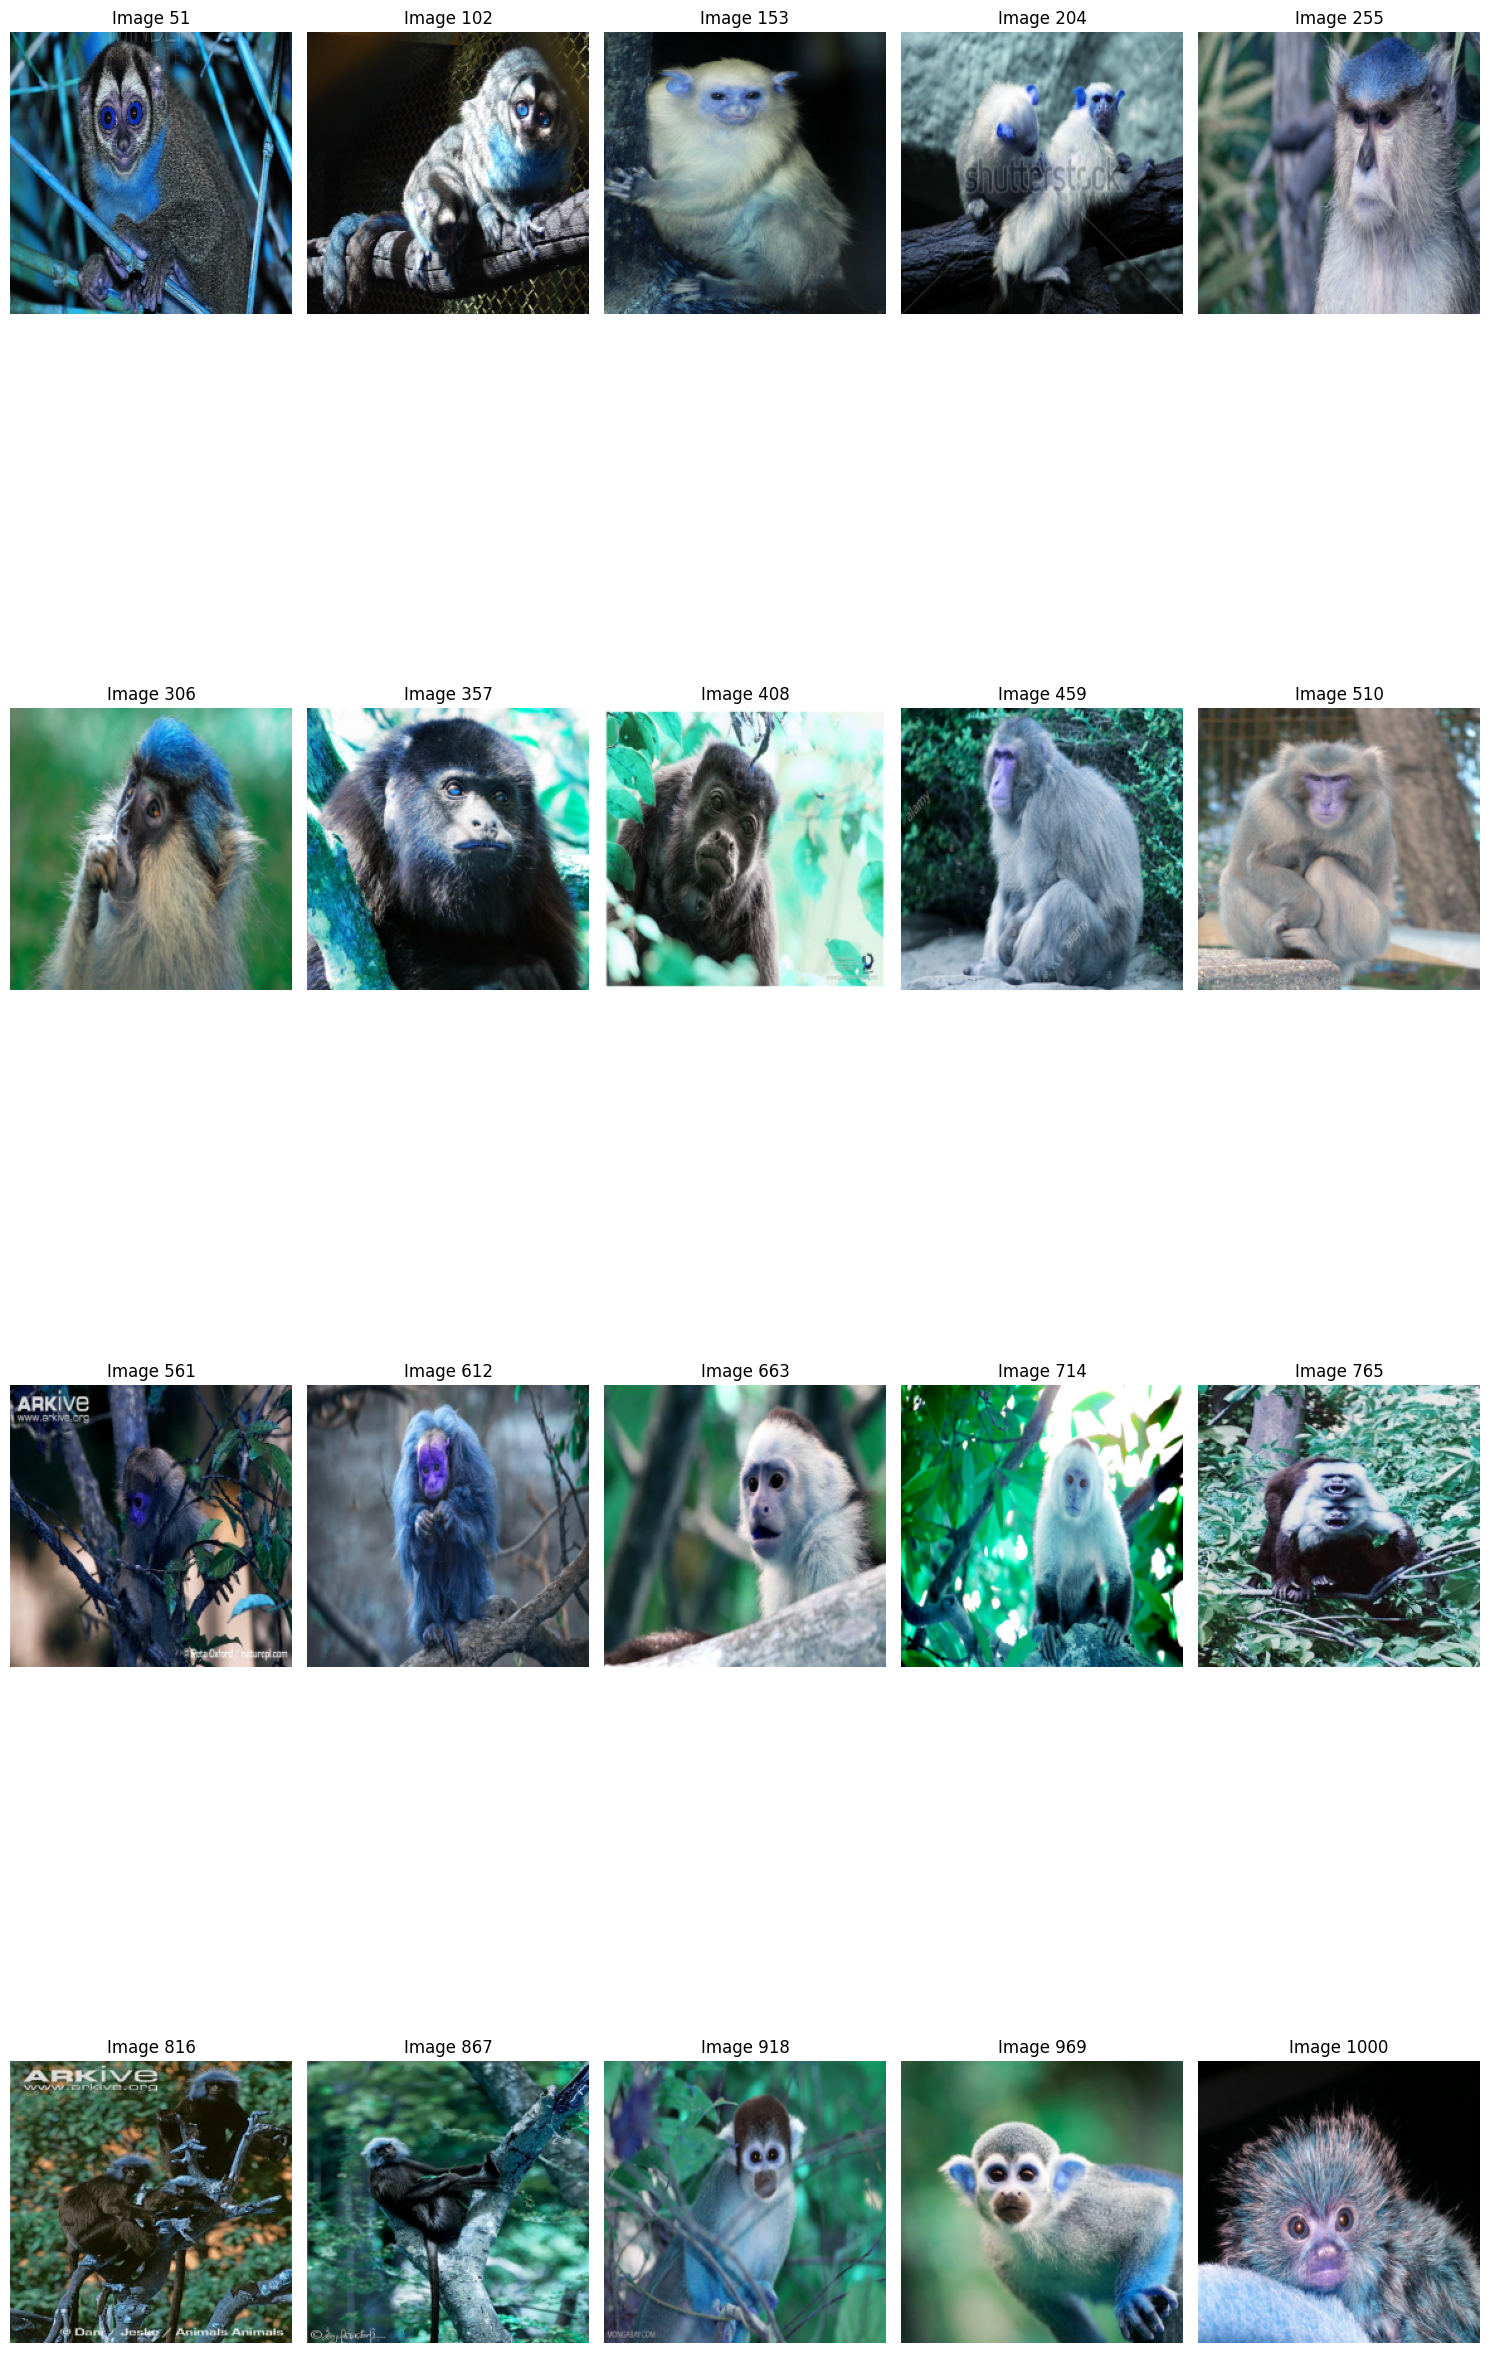

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_train is a NumPy array containing the images
start_index = 0
skip = 51
for i in range(start_index, 1000):
    plt.subplot(4, 5, i // skip + 1)  # Create a 4x5 grid of subplots for the selected images
    plt.imshow(X_train[i])
    plt.axis('off')  # Turn off the axis labels and ticks
    plt.title(f"Image {i + 1}")  # Add a title to each subplot

plt.tight_layout()  # Adjust subplot spacing for a better layout
plt.show()


Data set has water marked images

#reference

#tensorflow model

In [ ]:
from keras.src.optimizers import optimizer
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub

from keras.optimizers import Optimizer

from IPython.display import clear_output
import matplotlib.pyplot as plt

tf_Model = "https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"
model = hub.KerasLayer(tf_Model, input_shape = (224, 224, 3), trainable = False)

In [ ]:
y_trainHot.shape

(1092, 10)

In [ ]:
def modeling(xtrain, ytrain, xtest, ytest, numepocs) :
  classifier = tf.keras.Sequential([
    model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(30, activation = "relu"),
    tf.keras.layers.Dense(20, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
  ])
  classifier.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['categorical_accuracy'])
  classifier.summary()
  fitted = classifier.fit(xtrain, ytrain, epochs = numepocs, validation_data= (xtest, ytest))
  score = classifier.evaluate(xtest, ytest)
  y_pred = classifier.predict(xtest)
  y_classes_pred = np.argmax(y_pred, axis = 1)
  y_classes_true = np.argmax(ytest, axis = 1)
  plt.figure(figsize=(15,15))
  plt.title("Training Accuracy")
  plt.subplot(1,2,1)
  plt.plot(fitted.history['loss'])
  plt.plot(fitted.history['categorical_accuracy'])
  plt.legend(['Loss', 'Categorical Accuracy'], loc = 'upper left')
  plt.figure(figsize=(15,15))
  plt.title("Test Accuracy")
  plt.subplot(1,2,1)
  plt.plot(fitted.history['val_loss'])
  plt.plot(fitted.history['val_categorical_accuracy'])
  plt.legend(['Val Loss', 'Val Categorical Accuracy'], loc = 'upper left')
  return classifier



# 'categorical_crossentropy'
# "Adam"
# 'categorical_hinge'
# "SGD"

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              4226432   
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 50)                64050     
                                                                 
 dense_5 (Dense)             (None, 30)                1530      
                                                                 
 dense_6 (Dense)             (None, 20)                620       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
Total params: 4292842 (16.38 MB)
Trainable params: 664

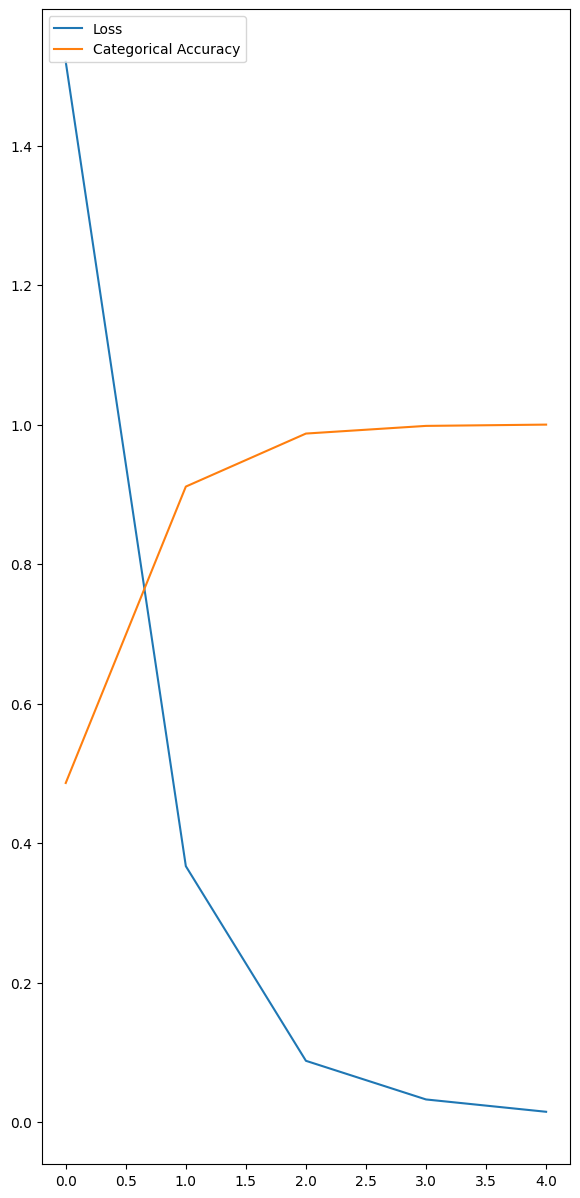

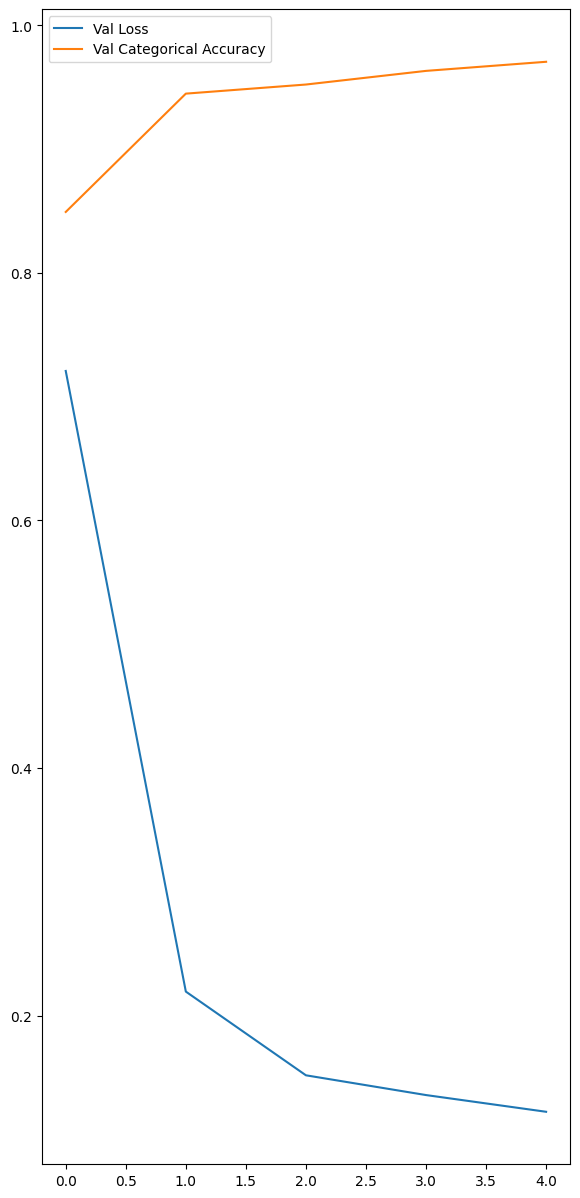

In [ ]:
classifier = modeling(X_train, y_trainHot, X_test, y_testHot, 5)

1/1 [==============================] - 0s 24ms/step


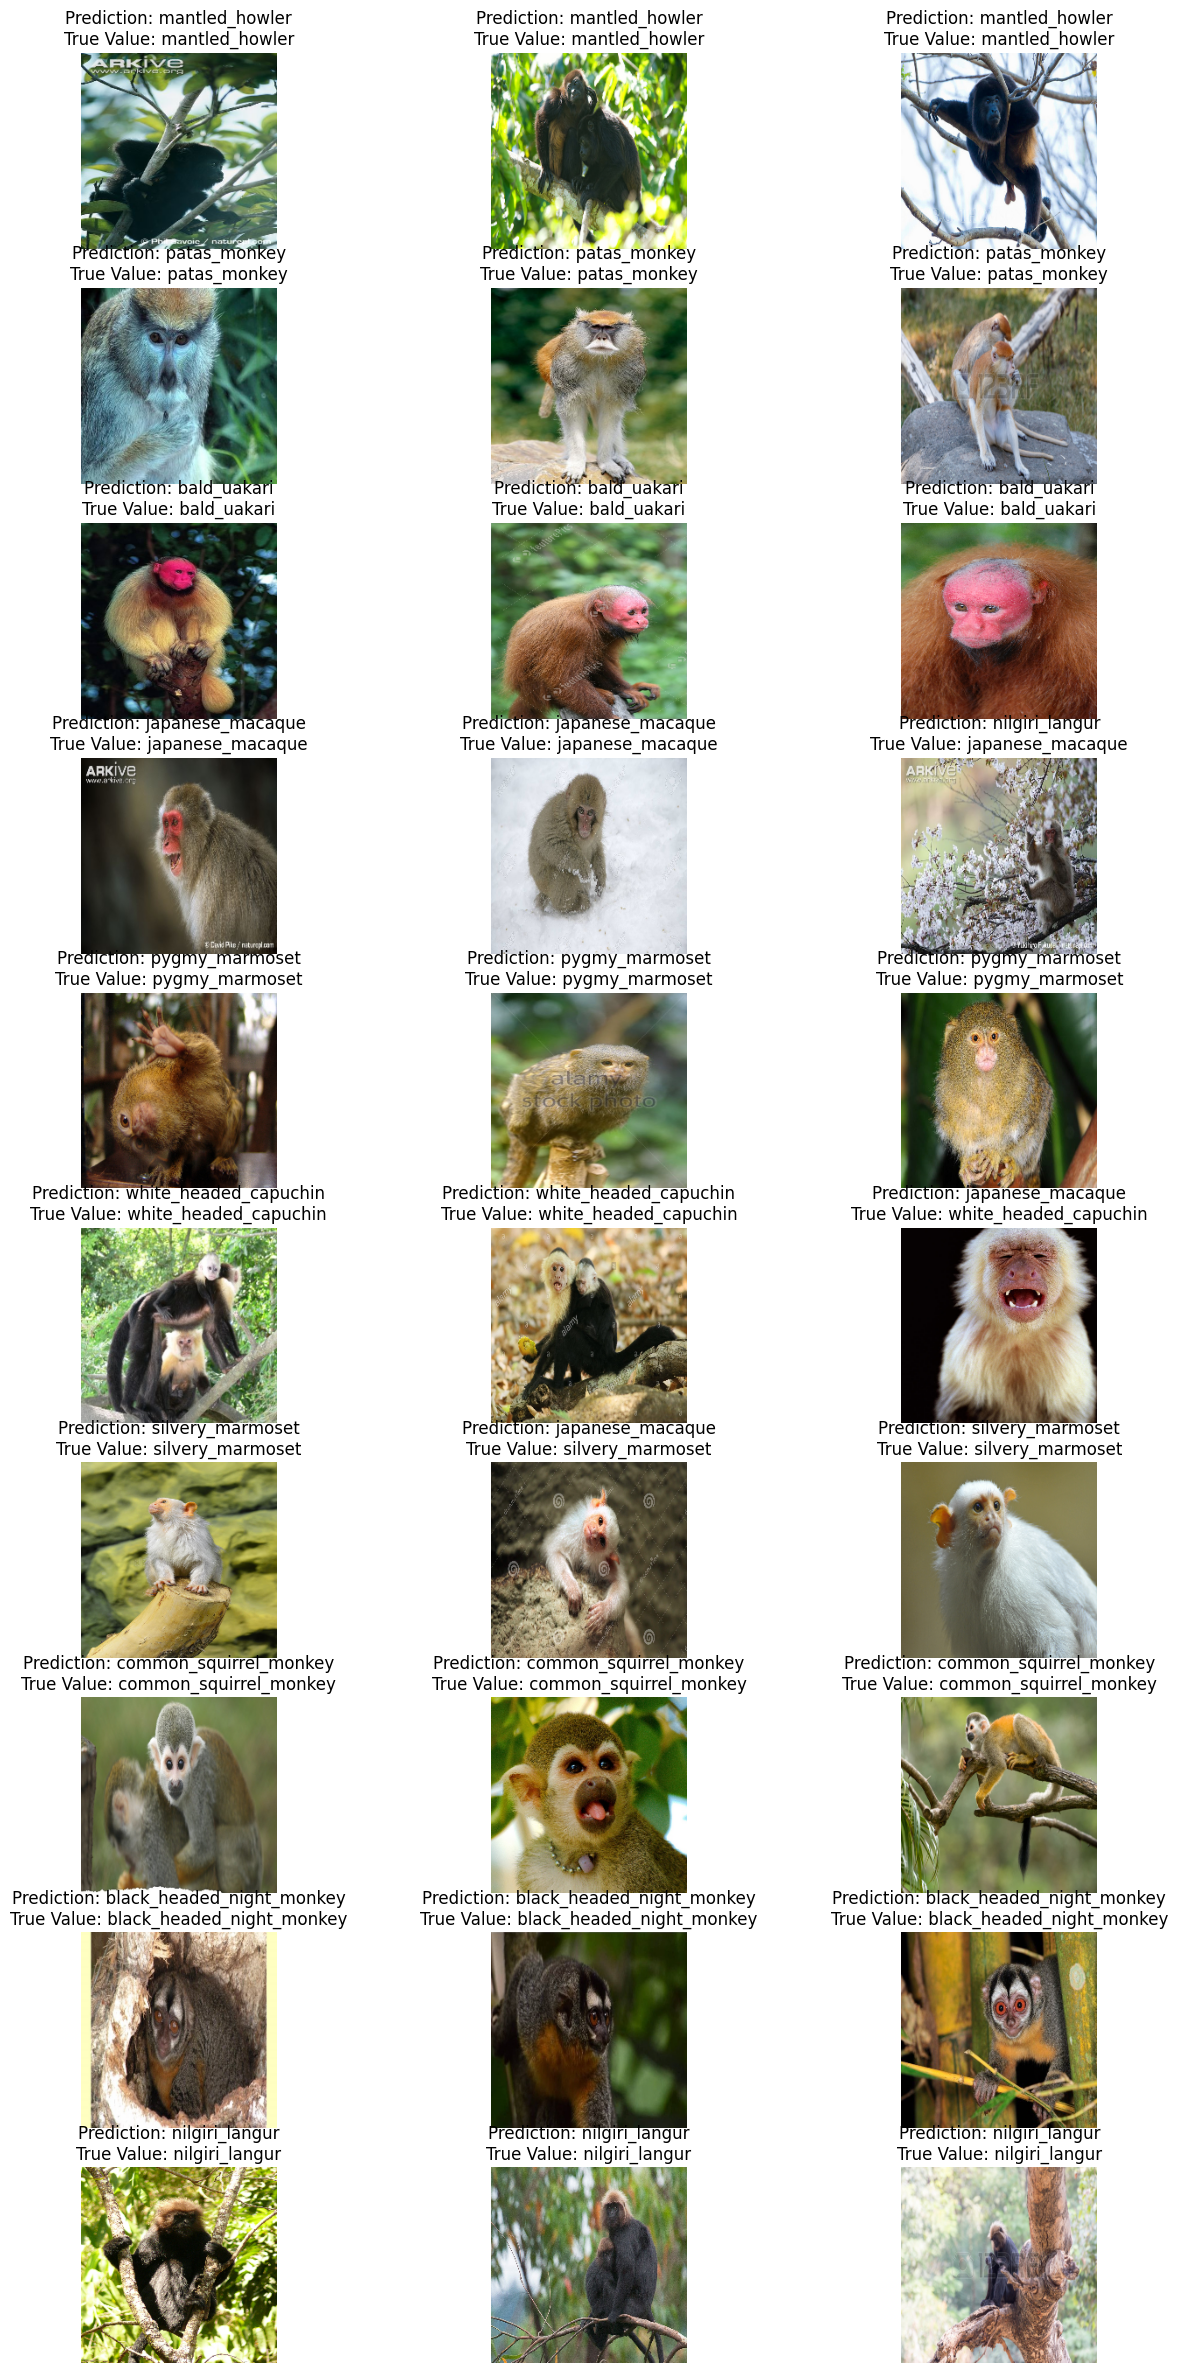

In [ ]:
IMAGE_SHAPE = (224, 224)

labels = {
    0: 'mantled_howler',
    1: 'patas_monkey',
    2: 'bald_uakari',
    3: 'japanese_macaque',
    4: 'pygmy_marmoset',
    5: 'white_headed_capuchin',
    6: 'silvery_marmoset',
    7: 'common_squirrel_monkey',
    8: 'black_headed_night_monkey',
    9: 'nilgiri_langur'
}

# preprocess an image and make predictions
def predict_image_class(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, IMAGE_SHAPE)
    img = img / 255.0  # normalize
    img = np.expand_dims(img, axis=0)  # add batch dimension

    # Make predictions
    predictions = classifier.predict(img)
    predicted_class_index = np.argmax(predictions)
    return predicted_class_index

# Directory of monkey images
monkey_base_dir = '/content/TFMonkeyClassification/validation/'
monkey_directories = ['n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9']

# subplots and figure size
plt.rcParams['figure.figsize'] = (15, 30)

# Iterate from n0 to n9
for i, monkey_directory in enumerate(monkey_directories):
    monkey_image_dir = monkey_base_dir + monkey_directory
    monkey_image_paths = glob.glob(monkey_image_dir + '/**/*.jpg', recursive=True)
    true_class = labels[i]

    # Print predictions and true values
    for j, image_path in enumerate(monkey_image_paths[:3]):
        predicted_class_index = predict_image_class(image_path)
        im = cv2.imread(image_path)
        im = cv2.resize(im, IMAGE_SHAPE)
        plt.subplot(10, 3, i * 3 + j + 1)
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        predicted_class = labels[predicted_class_index]
        # Display prediction and true value
        plt.title(f"Prediction: {predicted_class}\nTrue Value: {true_class}")

plt.show()
